## Импорт библиотек

In [1]:
import warnings
warnings.filterwarnings('ignore')
import sys
import os
import random as rnd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sps
from datetime import datetime
import datetime as dt
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x).replace(',',' ')) # Формат чисел в таблицах pandas
print(sys.executable)
sys.version

c:\users\user\appdata\local\programs\python\python38\python.exe


'3.8.9 (tags/v3.8.9:a743f81, Apr  6 2021, 14:02:34) [MSC v.1928 64 bit (AMD64)]'

## Параметры кода:

In [2]:
segm = 'ДМС' # Наименование сегмента в массиве выплат
myfunc = 'x*1' # Функция корректировки исторического массива выплат
segmpr = 'ДМС' # Наименование сегмента в профиле риска
iters = 1000 # Количество итераций для имитационного моделирования

## 1. Загрузка исходных данных

In [3]:
df = pd.read_csv("Input/ДМС_выборка.csv", sep=';', decimal=',', encoding = "1251", index_col=None,
    dtype={'Сегмент':str}, parse_dates=['Дата оплаты']).round({'Выплаты':2}) #Загрузка журнала выплат
df.Выплаты = df.Выплаты.astype('float64')
#df.info()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10115 entries, 0 to 10114
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Выплаты      10115 non-null  float64       
 1   Сегмент      10115 non-null  object        
 2   Дата оплаты  10115 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 237.2+ KB


In [5]:
# загрузка данных профиля риска
rp = pd.read_excel("Input/Профиль риска.xlsx", sheet_name=0)
rp

,Сегмент,Средняя_страховая_сумма,Премия,Количество_действующих_договоров,Мат_ожидание_кол-ва_убытков_за_все_время,Срезневзвешенный_pro_rata,Убытки_будущих_периодов,Мат_ожидание_кол-ва_убытков,Уже_выплачено по действ_портфелю
0,ДМС,20000,3 445 161 959.52,137376,13 737.60,0.67,0.40,5 495.04,1555666


## 2. Определение выборки выплат и визуализация данных

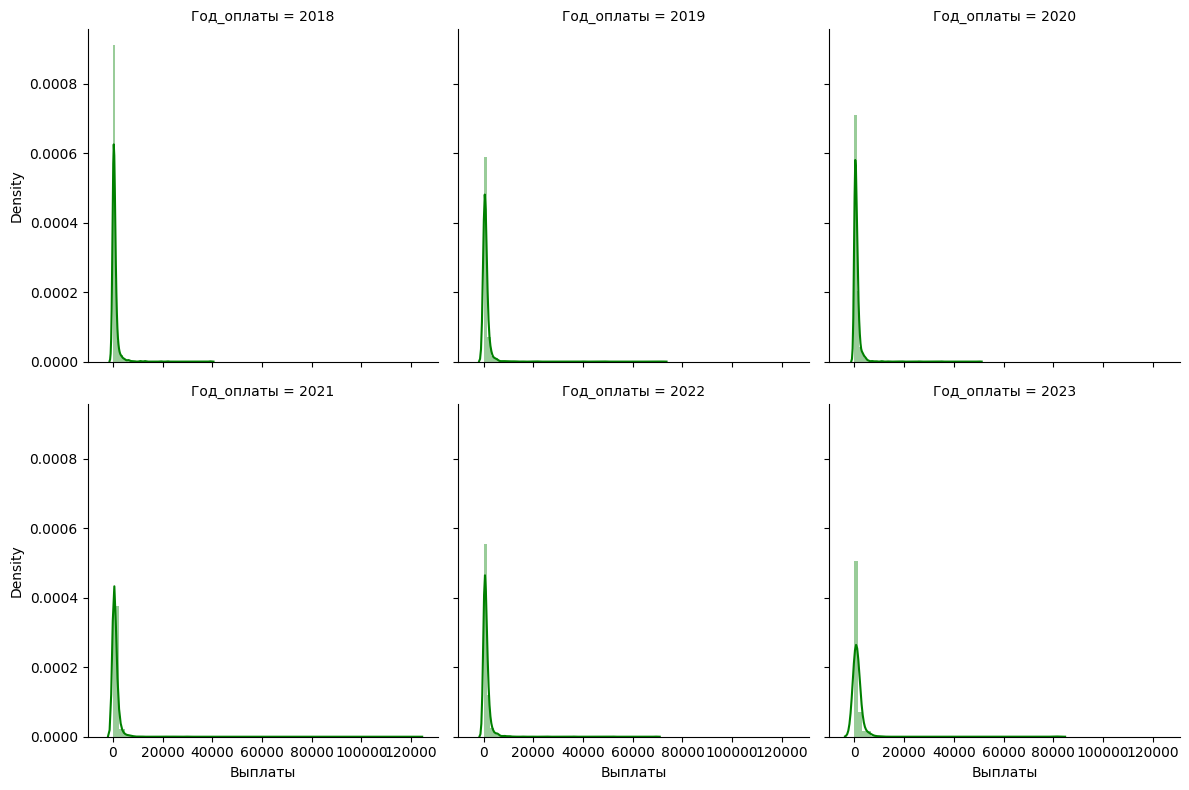

In [6]:
# Визуализация выплат по выбранному сегменту по годам:
df['Год_оплаты'] = df['Дата оплаты'].dt.year
g = sns.FacetGrid(data = df[(df.Сегмент==segm) & (df.Выплаты<1000000) & (df.Выплаты>0)], 
                  col='Год_оплаты', col_wrap=3, height =4, aspect = 1)
g.map(sns.distplot, 'Выплаты', color='green');

In [8]:
Paid = df[(df.Сегмент==segm) & (df.Выплаты>0)].Выплаты  # Срез столбца выплат из массива
Paid = list(map(lambda x: eval(myfunc), Paid))  # Корректировка статистики прошлых выплат
pd.DataFrame(Paid).to_csv("Result/Paid_" + "_" + segmpr + ".csv", sep=';', decimal=',', encoding = "1251") # Сохранение скорректированного списка выплат
pd.DataFrame(Paid).describe().round(0) #Статистические характеристики итоговой совокупности выплат

,0
count,9 890.00
mean,1 038.00
std,2 583.00
min,0.00
25%,260.00
50%,600.00
75%,1 192.00
max,122 500.00


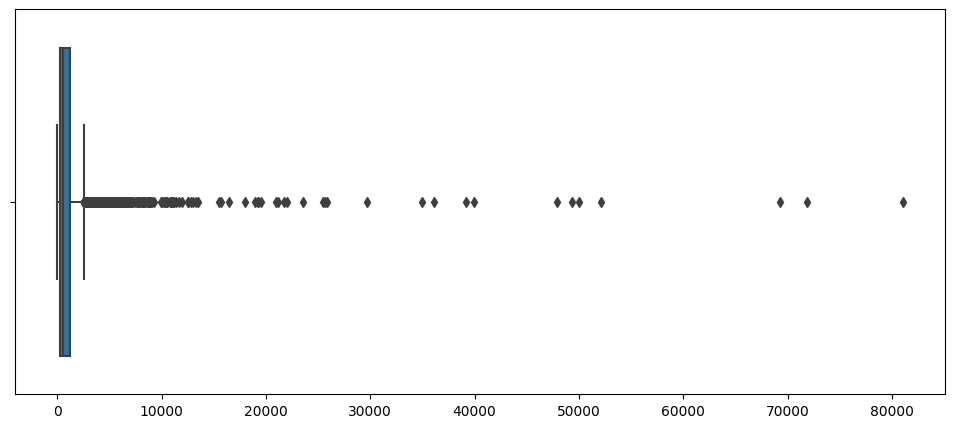

In [9]:
# График выплат - ящик с усами:
plt.figure(figsize=(12,5)) # Создание холста заданного размера для графика
sns.boxplot(x=sorted(Paid)[:-1]); # Создание графика - ящик с усами

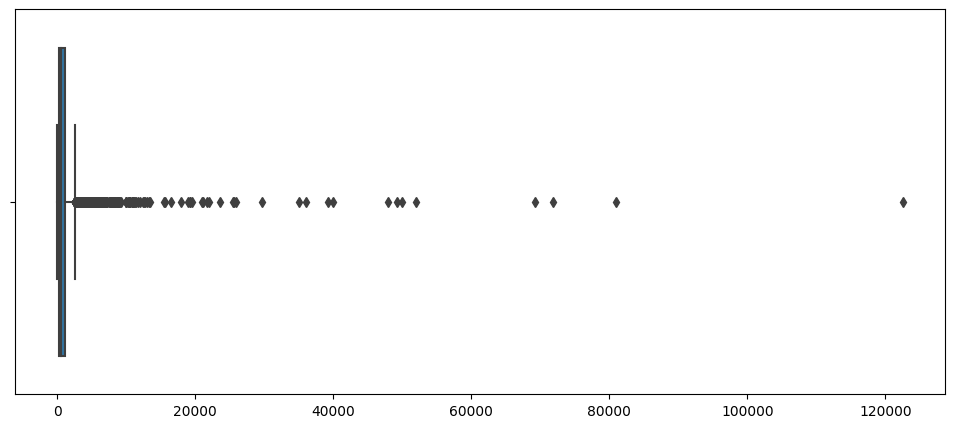

In [10]:
# График выплат - ящик с усами:
plt.figure(figsize=(12,5)) # Создание холста заданного размера для графика
sns.boxplot(x=Paid); # Создание графика - ящик с усами

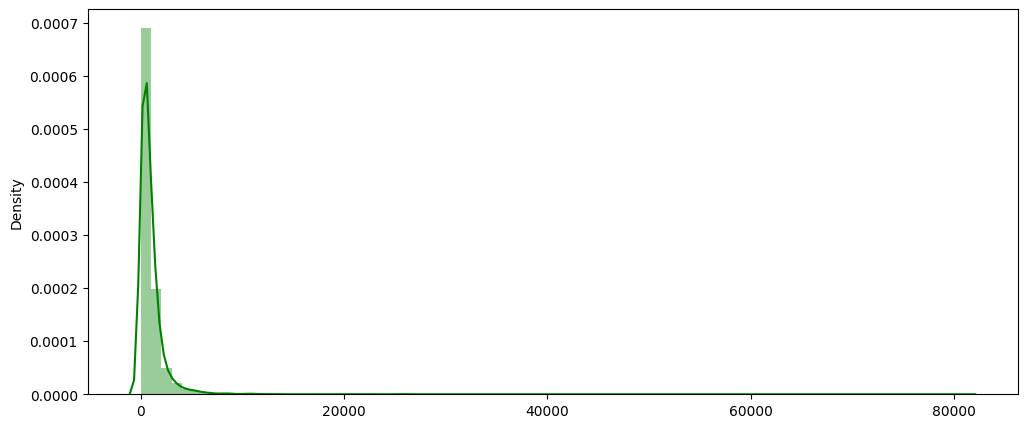

In [11]:
# График выплат - гистограмма с плотностью распределения:
plt.figure(figsize=(12,5)) # Создание холста заданного размера для графика
sns.distplot(sorted(Paid)[:-1], bins = 80, color='green'); # Сам график

#### Ячейка ниже используется, если исторический массив выплат генерируется вручную:

[740771.0, 575020.0, 222958.0, 761716.0, 881769.0, 94335.0, 734010.0, 134161.0, 775992.0, 26065.0, 538525.0, 762110.0, 712582.0, 789858.0, 652318.0, 926623.0, 702593.0, 818796.0, 804816.0, 150744.0, 515528.0, 358388.0, 26335.0, 492558.0, 551501.0, 551745.0, 637341.0, 439405.0, 961922.0, 20358.0, 2000000.0, 2000000.0, 2000000.0, 2000000.0, 2000000.0, 2000000.0, 2000000.0, 2000000.0, 2000000.0, 2000000.0, 1000000.0, 1000000.0, 1000000.0]


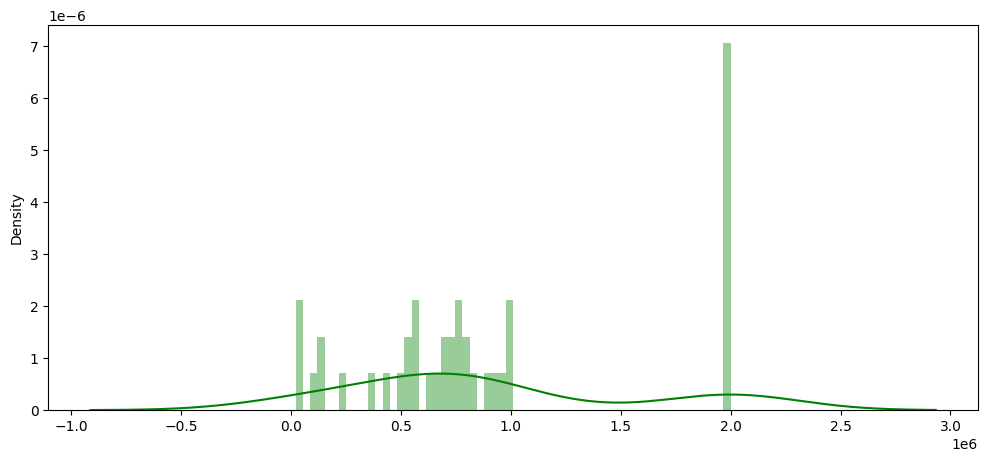

In [13]:
#Создание массива выплат (при необходимости):
a1 = np.random.randint(10000, 1000000, 30) # 1 способ - генерация значений в заданном интервале
a2 = np.zeros(10) + 2000000 # 2 способ - генерация одинаковых значений с помощью np.zeros
a3 = np.ones(3) * 1000000 # 3 способ - генераия одинаковых значений с помощью np.ones
MyPaid = list(np.concatenate((a1,a2,a3))) # объединение в один массив
print(MyPaid)
# График полученного массива выплат:
plt.figure(figsize=(12,5)) # Создание холста для графика
sns.distplot(MyPaid, bins=60, color='green'); # Создание графика
# Сохранение полученного массива выплат в csv для возможного анализа на предмет закона распределения:
pd.DataFrame(MyPaid).to_csv("Result/Paid_created_" + "_" + segmpr + ".csv", sep=';', decimal=',', encoding = "1251")

In [14]:
#Пример для теста:
a1 = [500000, 2000000]
a2 = np.random.randint(10000, 100000, 10)
Paidtest = list(np.concatenate((a1, a2)))
Paidtest

[500000,
 2000000,
 74493,
 22574,
 93223,
 65535,
 75277,
 72019,
 17912,
 29368,
 40091,
 96319]

## 3. Прогноз будущих выплат

### 3.1 Подбор параметров закона распределения величины индивидуальной выплаты

In [15]:
# Посмотреть список имеющихся законов распределения в кол-ва параметров в них
my_distrs = [d for d in dir(sps) if isinstance(getattr(sps, d), sps.rv_continuous)]
print(len(my_distrs))
for i in my_distrs:
    print(f' В распределении {i} {eval("sps." + i + ".numargs")} параметров')

107
 В распределении alpha 1 параметров
 В распределении anglit 0 параметров
 В распределении arcsine 0 параметров
 В распределении argus 1 параметров
 В распределении beta 2 параметров
 В распределении betaprime 2 параметров
 В распределении bradford 1 параметров
 В распределении burr 2 параметров
 В распределении burr12 2 параметров
 В распределении cauchy 0 параметров
 В распределении chi 1 параметров
 В распределении chi2 1 параметров
 В распределении cosine 0 параметров
 В распределении crystalball 2 параметров
 В распределении dgamma 1 параметров
 В распределении dweibull 1 параметров
 В распределении erlang 1 параметров
 В распределении expon 0 параметров
 В распределении exponnorm 1 параметров
 В распределении exponpow 1 параметров
 В распределении exponweib 2 параметров
 В распределении f 2 параметров
 В распределении fatiguelife 1 параметров
 В распределении fisk 1 параметров
 В распределении foldcauchy 1 параметров
 В распределении foldnorm 1 параметров
 В распределении gamm

In [16]:
sps.gamma.fit(Paid)

(6.388299312874214e-05, 0.0020568568725138825, 4.28657687613594)

 Распределение alpha с параметрами (1.778995608133671, -427.451524053948, 1792.7029624966501)
 Распределение beta с параметрами (0.8965818921815103, 729.5972888537977, 0.002056856872512793, 850796.285487432)
 Распределение lomax с параметрами (4.5980124295293745, 0.002056855216440328, 3540.301308172422)
 Распределение weibull_min с параметрами (0.8403158686182859, 0.0020568568725003672, 399.97034619839894)
 Распределение dweibull с параметрами (0.7341246777538433, 400.0000000000001, 607.052976918877)
 Распределение pareto с параметрами (4.597994066597803, -3540.273195258112, 3540.275252114984)
 Распределение invweibull с параметрами (0.24537007316917098, 0.00045784185918743665, 2.494882738812957)


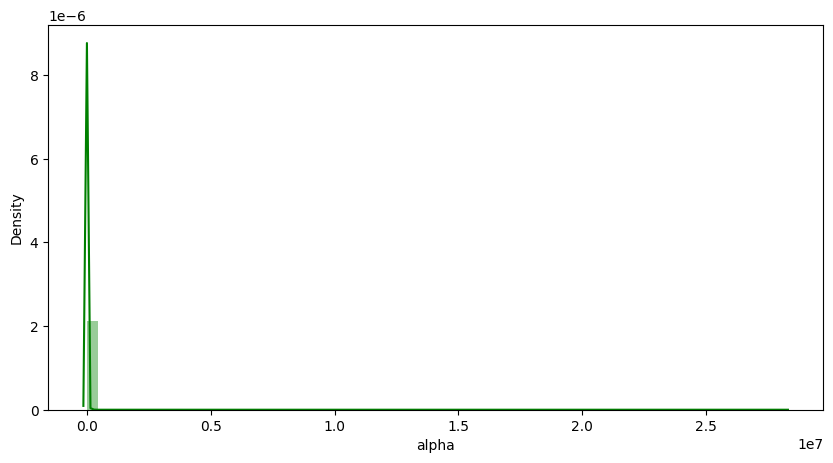

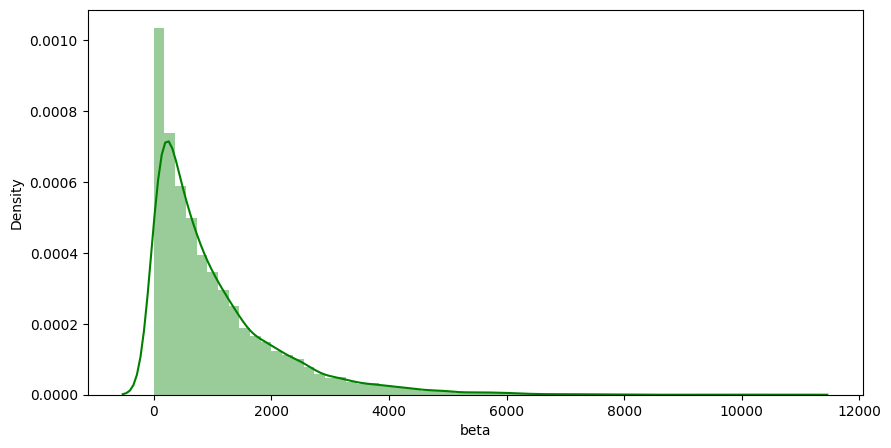

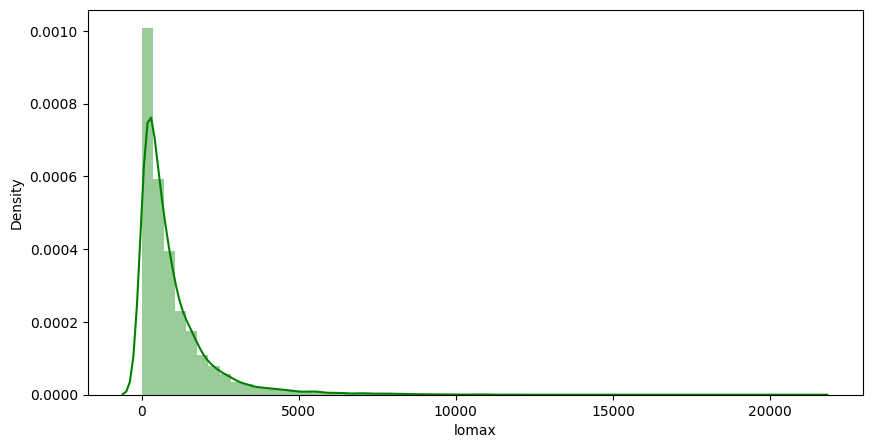

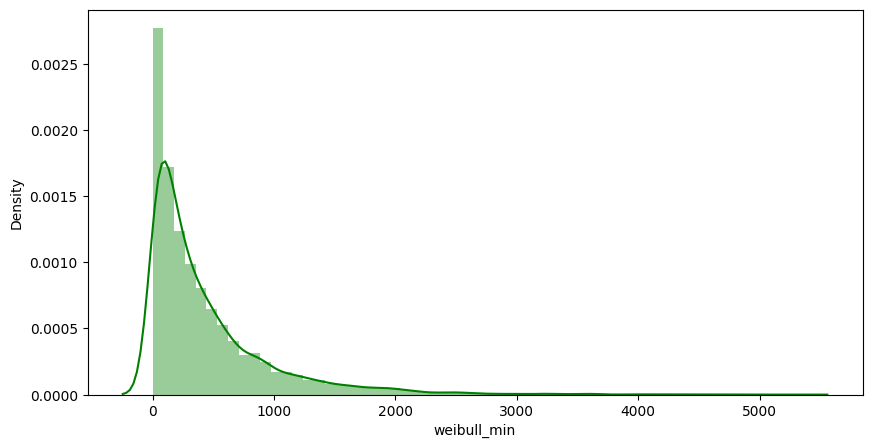

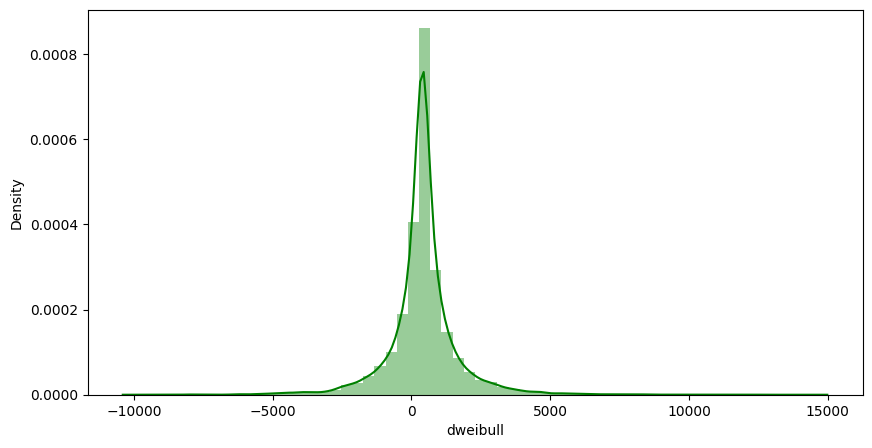

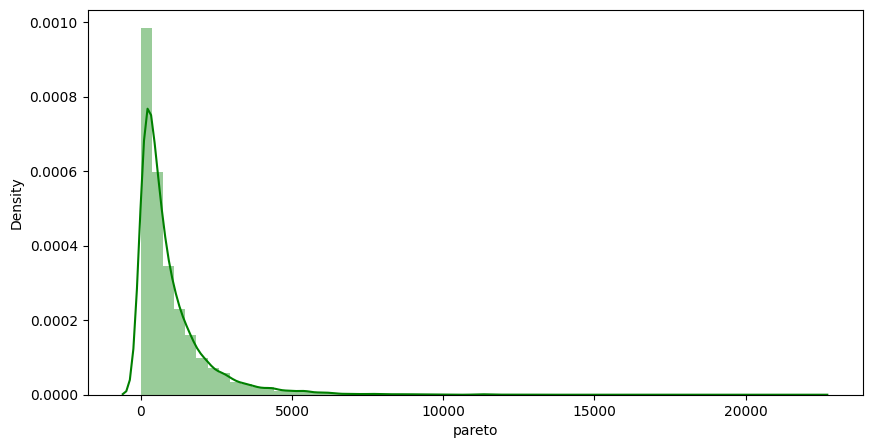

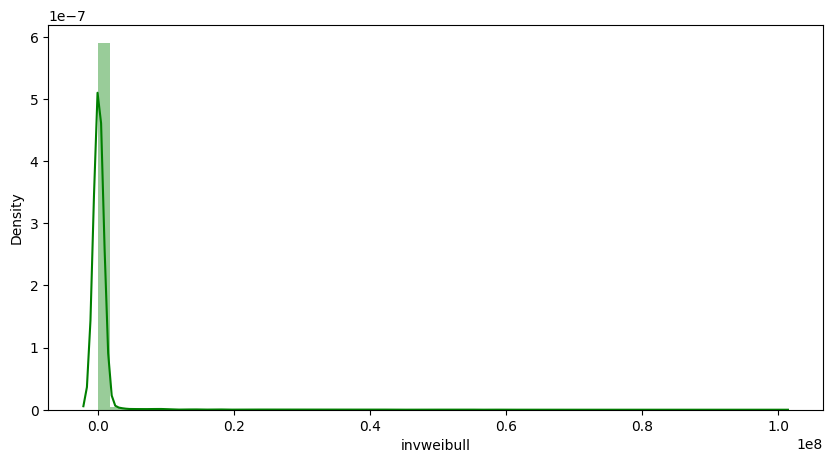

In [31]:
distrs = [d for d in dir(sps) if isinstance(getattr(sps, d), sps.rv_continuous) if eval("sps." + d + ".numargs") in [1, 2]] # Все непрерывные законы распределения
distrs = ['alpha', 'beta', 'lomax', 'weibull_min', 'dweibull', 'pareto', 'invweibull'] # Список выбранных законов распределения
          #'genlogistic', 'f', 'fisk', 'dgamma', 'crystalball', 'burr', 'bradford', 'norminvgauss', 't'] # Список выбранных законов распределения
Gen_Paid = [] # Список списков выплат, полученных по разным распределениям
for i in range(len(distrs)):
    print(f" Распределение {distrs[i]} с параметрами {eval('sps.' + distrs[i] + '.fit(Paid)')}")
    if eval('sps.' + distrs[i] + '.numargs') == 1:
        a, b, c = eval('sps.' + distrs[i] + '.fit(Paid)')
        Future_Payments = pd.DataFrame(eval('sps.' + distrs[i] + '.rvs(a, b, c, 10000)'), columns=['Сумма'])
    else:
        a, b, c, d = eval('sps.' + distrs[i] + '.fit(Paid)')
        Future_Payments = pd.DataFrame(eval('sps.' + distrs[i] + '.rvs(a, b, c, d, 10000)'), columns=['Сумма'])
    Future_Payments = Future_Payments[Future_Payments['Сумма'] < 100000000] # Порог максимального размера выплаты (значения больше него исключаются)
    plt.figure(figsize=(10,5))
    sns.distplot(Future_Payments, bins=60, color='green',axlabel = distrs[i]); # Графики
    Gen_Paid.append(sorted(Future_Payments.Сумма.tolist(),reverse = True))
GenDf = pd.DataFrame(Gen_Paid).T.round(2)
GenDf.columns = distrs
GenDf.to_excel("Result/Paid_Gen_" + "_" + segmpr + ".xlsx", sheet_name = 'PaidGenerated')

In [18]:
alpha_level = 0.05
for dist in GenDf.columns:
    tt_res_1 = sps.ttest_ind(GenDf[dist].fillna(0), Paid) # Проверка гипотезы равенства матожиданий
    tt_res_2 = sps.levene(GenDf[dist].fillna(0), Paid) # Проверка гипотезы равенства дисперсий
    tt_res_3 = sps.mannwhitneyu(GenDf[dist].fillna(0), Paid) # Проверка гипотезы равенства медиан
    for tt_res in [[tt_res_1,'матожиданий'], [tt_res_2, 'дисперсий'], [tt_res_3, 'медиан']]:
        check = tt_res[0][1] < alpha_level
        print(f"Распределение {dist} {check * 'плохо' + (1 - check) * 'хорошо'} соответствует прошлой статистике по близости {tt_res[1]}")

Распределение alpha хорошо соответствует прошлой статистике по близости матожиданий
Распределение alpha хорошо соответствует прошлой статистике по близости дисперсий
Распределение alpha хорошо соответствует прошлой статистике по близости медиан
Распределение beta хорошо соответствует прошлой статистике по близости матожиданий
Распределение beta хорошо соответствует прошлой статистике по близости дисперсий
Распределение beta плохо соответствует прошлой статистике по близости медиан
Распределение lomax плохо соответствует прошлой статистике по близости матожиданий
Распределение lomax хорошо соответствует прошлой статистике по близости дисперсий
Распределение lomax плохо соответствует прошлой статистике по близости медиан
Распределение weibull_min плохо соответствует прошлой статистике по близости матожиданий
Распределение weibull_min плохо соответствует прошлой статистике по близости дисперсий
Распределение weibull_min плохо соответствует прошлой статистике по близости медиан
Распределен

In [19]:
# Выбранный способ генерации по закону распределения:
#generation = '[rnd.weibullvariate(alpha=500000, beta=1) for i in range(10000)] '
generation = 'list(sps.weibull_min.rvs(0.970791495470603, 0.9999999999999998, 74909.67238509629, size = Paid_quantity[i]))'

### 3.3 Выполнение процедуры моделирования будущих выплат и расчёта показателей по перестрахованию:

In [20]:
num = int(rp[rp['Сегмент']== segmpr]['Мат_ожидание_кол-ва_убытков']) # Мат ожидание количества убытков на каждой итерации
Paid_quantity = list(sps.poisson.rvs(num, size=iters)) # Генерация количества выплат по годам
print(f'Количество выплат по годам:{Paid_quantity[:50]}')

Количество выплат по годам:[5467, 5428, 5500, 5496, 5383, 5511, 5442, 5462, 5452, 5510, 5448, 5511, 5461, 5510, 5471, 5525, 5537, 5437, 5466, 5392, 5545, 5528, 5482, 5550, 5591, 5392, 5593, 5486, 5466, 5573, 5537, 5464, 5441, 5662, 5600, 5384, 5568, 5554, 5510, 5539, 5585, 5532, 5637, 5309, 5538, 5468, 5390, 5485, 5380, 5493]


In [21]:
num = int(rp[rp['Сегмент']== segmpr]['Мат_ожидание_кол-ва_убытков']) # Мат ожидание количества убытков на каждой итерации
Paid_quantity = list(sps.poisson.rvs(num, size=iters)) # Генерация количества выплат по годам
print(f'Количество выплат по годам:{Paid_quantity[:50]}')
# Ввод способа генерации будущих выплат:
method = input('Введите способ генерации (1 - Бутстреппинг, иначе - закон распределения): ')
# Цикл генерации выплат и расчёта долей перестраховщиков для каждого года:
Result = [] # Объявление массива результатов - список списков значений, полученных на каждой итерации
AllPayments = [] # Объявление списка всех индивидуальных выплат
for i in range(len(Paid_quantity)):
    if method == '1':
        Payments = rnd.choices(Paid, k=Paid_quantity[i]) # Бутстреппинг
    else:
        Payments = eval(generation) # Если нет статистики
    AllPayments.append(np.array(Payments)) # Добавление списка выплат полученных на данной итераци в общий список
# Finalize(Result)
# pd.DataFrame(AllPayments).to_csv("Result/Detailed_Result_" + Dogname + "_" + segmpr + ".csv", sep=';', decimal=',', encoding = "1251")

Количество выплат по годам:[5458, 5399, 5545, 5491, 5393, 5556, 5508, 5339, 5401, 5481, 5524, 5481, 5515, 5480, 5403, 5455, 5529, 5431, 5472, 5412, 5507, 5566, 5573, 5480, 5602, 5488, 5496, 5555, 5364, 5414, 5524, 5461, 5563, 5497, 5520, 5430, 5514, 5573, 5455, 5556, 5552, 5627, 5564, 5530, 5574, 5381, 5470, 5568, 5413, 5527]


Введите способ генерации (1 - Бутстреппинг, иначе - закон распределения):  1


In [22]:
{i:pd.DataFrame(AllPayments).sum(axis=1).quantile(i).round(2) for i in np.arange(0.7, 0.95, 0.05)}

{0.7: 5812073.06,
 0.75: 5845683.88,
 0.8: 5886918.58,
 0.8500000000000001: 5932107.12,
 0.9000000000000001: 5993571.42}

In [23]:
rp['Уже_выплачено по действ_портфелю'][0]

1555666

In [25]:
totals = pd.DataFrame(AllPayments).sum(axis=1)

In [26]:
my_avg, my_std = totals.mean(), totals.std()
my_std/my_avg

0.03693040832317997

In [27]:
pd.DataFrame({'Среднее':my_avg, 'СКО':my_std, 'ВКО':my_std/my_avg}, index = [1])

,Среднее,СКО,ВКО
1,5 714 483.57,211 038.21,0.04


In [28]:
final_df = pd.DataFrame({'Среднее':my_avg, 'СКО':my_std, 'ВКО':my_std/my_avg}, index = [1])

In [29]:
with pd.ExcelWriter('Result/Final_tables.xlsx') as writer:
    # pd.DataFrame(AllPayments).to_excel(writer, sheet_name='Детально', index = False)
    # writer.sheets['Детально'].set_column(0, AllPayments.shape[1], 14, writer.book.add_format({'num_format':'### ### ##0'}))
    pd.DataFrame(AllPayments).sum(axis=1).to_excel(writer, sheet_name='Сумма_по_итер', index = False)
    writer.sheets['Сумма_по_итер'].set_column(0, 1, 14, writer.book.add_format({'num_format':'### ### ##0'}))
    final_df.to_excel(writer, sheet_name='Итог_свод', index = False)
    writer.sheets['Итог_свод'].set_column(0, final_df.shape[1], 14, writer.book.add_format({'num_format':'### ### ##0'}))

In [30]:
pd.DataFrame(AllPayments).T.to_excel("Result/Final_table.xlsx")